## LangGraph

## Graph


In [1]:
## we have created three fucntion
def function1(input1):
    return input1 + " from first function."

def function2(input2):
    return input2 + " Sharma from second function"

def function3(input3):
    pass

In [2]:
function1("Ashutosh")

'Ashutosh from first function.'

In [3]:
function2("Sharma")

'Sharma Sharma from second function'

In [4]:
## orchestrate thee function using langgraph
from langgraph.graph import Graph

workflow1 = Graph()
## adding function1 as a node
workflow1.add_node('func1', function1)

In [5]:
workflow1.add_node('func2', function2)

In [6]:
## adding edges
workflow1.add_edge('func1','func2')

In [7]:
## set entrypoint
workflow1.set_entry_point('func1')
workflow1.set_finish_point('func2')

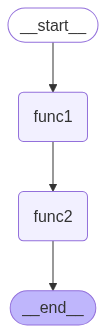

In [8]:
## comple the workflow
app = workflow1.compile()
app

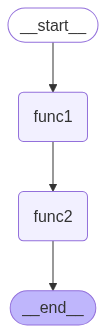

In [9]:
from IPython.display import Image,display
## display the flow as png image
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
app.invoke("Hi this is Ashu")

'Hi this is Ashu from first function. Sharma from second function'

In [11]:
for output in app.stream("Hi this is Shanu"):
    for key,value in output.items():
        print(f"Here is output from :  {key}")
        print("-"*30)
        print(f"Here is output from :  {value}")

Here is output from :  func1
------------------------------
Here is output from :  Hi this is Shanu from first function.
Here is output from :  func2
------------------------------
Here is output from :  Hi this is Shanu from first function. Sharma from second function


In [12]:
from langchain_openai import ChatOpenAI

In [13]:
def llm(input):
    model= ChatOpenAI(model='gpt-4o-mini')
    output = model.invoke(input)
    return output.content

def token_counter(input):
    token = str(input).split()
    count_no = len(token)
    return count_no

In [14]:
token_counter("This is ashu")

3

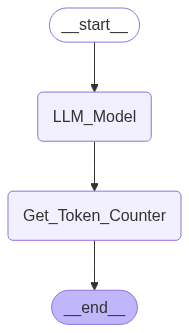

In [18]:
workflow2 = Graph()
workflow2.add_node('LLM_Model',llm)
workflow2.add_node('Get_Token_Counter',token_counter)
workflow2.add_edge('LLM_Model','Get_Token_Counter')
workflow2.set_entry_point('LLM_Model')
workflow2.set_finish_point('Get_Token_Counter')
app2 = workflow2.compile()
app2

In [19]:
app2.invoke("What is an AI Agent?")

256

In [21]:
for output in app2.stream("what is an AI Agent?"):
    for key,value in output.items():
        print(f"Here is output from :  {key}")
        print("-"*30)
        print(f"Here is output from :  {value}")

Here is output from :  LLM_Model
------------------------------
Here is output from :  An AI agent is a software entity that uses artificial intelligence techniques to perceive its environment, reason, and take actions to achieve specific goals. AI agents can autonomously make decisions based on the data they receive from their surroundings, which could include inputs from sensors, user interactions, or data sources. Here are some key characteristics of AI agents:

1. **Autonomy**: AI agents can operate without human intervention to achieve their objectives.

2. **Perception**: They can sense their environment through various means, such as sensors, data input, or user commands, and then interpret this information.

3. **Reasoning and Learning**: Many AI agents are equipped with the ability to process the information they gather, learn from it, and improve their performance over time through techniques like machine learning.

4. **Action**: Based on their reasoning, AI agents can take 